In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
df = pd.read_csv("Ch10Ex11.csv",header=None)

In [3]:
df

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-0.961933,0.441803,-0.975005,1.417504,0.818815,0.316294,-0.024967,-0.063966,0.031497,-0.350311,...,-0.509591,-0.216726,-0.055506,-0.484449,-0.521581,1.949135,1.324335,0.468147,1.061100,1.655970
1,-0.292526,-1.139267,0.195837,-1.281121,-0.251439,2.511997,-0.922206,0.059543,-1.409645,-0.656712,...,1.700708,0.007290,0.099062,0.563853,-0.257275,-0.581781,-0.169887,-0.542304,0.312939,-1.284377
2,0.258788,-0.972845,0.588486,-0.800258,-1.820398,-2.058924,-0.064764,1.592124,-0.173117,-0.121087,...,-0.615472,0.009999,0.945810,-0.318521,-0.117889,0.621366,-0.070764,0.401682,-0.016227,-0.526553
3,-1.152132,-2.213168,-0.861525,0.630925,0.951772,-1.165724,-0.391559,1.063619,-0.350009,-1.489058,...,-0.284277,0.198946,-0.091833,0.349628,-0.298910,1.513696,0.671185,0.010855,-1.043689,1.625275
4,0.195783,0.593306,0.282992,0.247147,1.978668,-0.871018,-0.989715,-1.032253,-1.109654,-0.385142,...,-0.692998,-0.845707,-0.177497,-0.166491,1.483155,-1.687946,-0.141430,0.200778,-0.675942,2.220611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.075148,3.003267,-0.123441,-1.036740,-1.270604,-1.277029,-0.278504,1.249723,-0.706994,-0.704671,...,0.842161,-0.762154,0.546881,1.586981,-0.242043,0.507190,1.297424,0.314290,-1.513097,-0.074709
996,-1.226125,-0.501702,-0.717430,-0.169113,0.599530,-0.997987,0.028236,0.200508,-1.364865,0.564957,...,-1.012523,0.593252,-0.594506,-1.443559,-0.028870,0.052170,-0.867227,0.228531,-0.207759,-0.209665
997,-3.056328,0.449889,1.880362,-0.742841,2.238346,-0.291738,1.270233,0.696415,1.242857,0.429148,...,0.135085,-0.732077,-0.037468,-0.836689,0.020274,-0.803306,-0.907276,-0.781791,0.069908,1.336894
998,1.450658,1.310348,0.383837,-0.408860,-0.471111,-1.392396,-0.805808,0.210900,1.727079,0.862870,...,0.109018,-0.128521,0.860270,0.765015,-2.360090,0.252699,-1.461818,-0.812342,-1.095099,-1.460114


In [4]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.006397,-0.020648,-0.012895,-0.009400,-0.045544,-0.042226,0.034080,-0.014324,0.020891,0.011189,...,0.189425,0.258240,0.221008,0.210064,0.173273,0.228361,0.282274,0.225682,0.221513,0.281655
std,0.998075,0.997195,1.008409,1.013131,1.016670,0.990254,1.022071,0.999192,0.982149,1.002409,...,1.183923,1.147718,1.207654,1.183006,1.134924,1.168938,1.195357,1.206073,1.162343,1.192859
min,-3.056328,-3.240490,-3.527188,-3.065529,-2.997415,-2.853887,-2.745160,-3.627529,-2.852236,-2.571514,...,-3.479825,-2.884245,-2.897894,-3.348986,-3.855814,-2.921486,-2.866989,-3.233977,-2.711228,-3.581637
25%,-0.684539,-0.703363,-0.724498,-0.701827,-0.732105,-0.688266,-0.646953,-0.662942,-0.665161,-0.697114,...,-0.618339,-0.538287,-0.628595,-0.606410,-0.604322,-0.579119,-0.506256,-0.588777,-0.561043,-0.503109
50%,0.032338,-0.006061,0.000255,0.017350,-0.043965,-0.011043,0.030870,-0.050119,0.012293,-0.027185,...,0.117568,0.188091,0.139421,0.151444,0.107903,0.106549,0.221271,0.161899,0.121088,0.206375
75%,0.676673,0.660186,0.627725,0.669062,0.661267,0.605053,0.694150,0.639796,0.700920,0.690824,...,0.881510,0.957768,0.943367,0.907480,0.859763,0.892117,1.000320,0.984661,0.957578,0.987822
max,3.519299,3.084000,3.458551,3.222134,2.897466,3.069557,3.890746,3.353906,2.769713,3.548017,...,4.785525,5.617131,5.375790,4.502580,4.219149,4.485297,4.790423,4.618813,4.814904,5.275066


In [5]:
df.corr()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,1.000000,-0.028013,0.015303,-0.030405,-0.039928,-0.033158,0.005058,-0.050637,-0.033714,-0.058682,...,-0.019518,0.004001,-0.024002,-0.032853,-0.064466,-0.001224,-0.041685,-0.040801,-0.063718,-0.040906
1,-0.028013,1.000000,-0.037593,0.012790,0.028330,-0.047242,0.014055,0.000388,-0.004570,0.007274,...,0.023884,-0.008993,0.012682,-0.008374,-0.004504,-0.013603,0.023030,-0.005824,-0.007771,0.002346
2,0.015303,-0.037593,1.000000,0.054377,-0.032027,-0.008847,-0.013728,-0.014907,0.018114,-0.014695,...,-0.006819,-0.037341,-0.030655,0.018378,-0.028184,-0.009512,-0.023750,0.027635,-0.032744,0.024383
3,-0.030405,0.012790,0.054377,1.000000,-0.089872,-0.012385,-0.003622,-0.032545,0.025751,0.030194,...,0.042496,0.034020,0.018537,0.024967,0.006865,0.019796,-0.005030,0.039683,0.010653,0.057148
4,-0.039928,0.028330,-0.032027,-0.089872,1.000000,-0.023338,0.044184,-0.024820,-0.044871,0.038857,...,-0.021311,-0.023989,0.001207,-0.020737,0.044957,0.060473,0.027519,-0.037396,-0.019258,0.011776
5,-0.033158,-0.047242,-0.008847,-0.012385,-0.023338,1.000000,0.005198,0.023863,-0.025799,0.057953,...,0.046478,0.003155,-0.040520,-0.028019,0.022719,0.033325,-0.008727,0.013093,-0.019934,-0.057686
6,0.005058,0.014055,-0.013728,-0.003622,0.044184,0.005198,1.000000,-0.002212,0.057219,0.038324,...,0.001959,-0.036964,0.043507,-0.010537,0.001822,-0.038771,-0.011747,-0.014813,0.016545,-0.023481
7,-0.050637,0.000388,-0.014907,-0.032545,-0.024820,0.023863,-0.002212,1.000000,0.011561,0.028534,...,0.014845,-0.000878,-0.055633,0.015997,-0.047803,0.034586,0.036157,0.005157,-0.044224,0.019365
8,-0.033714,-0.004570,0.018114,0.025751,-0.044871,-0.025799,0.057219,0.011561,1.000000,0.008678,...,0.067879,0.039770,-0.016964,0.032590,-0.013505,-0.019678,-0.022298,-0.011817,0.000567,-0.016800
9,-0.058682,0.007274,-0.014695,0.030194,0.038857,0.057953,0.038324,0.028534,0.008678,1.000000,...,0.042919,0.041523,-0.004555,-0.001044,0.040332,0.032285,0.034183,-0.010841,0.001016,0.017014


In [6]:
hier_cluster = linkage(df, method='ward')

### Hierarchical Dendogram - Total 3 clusters

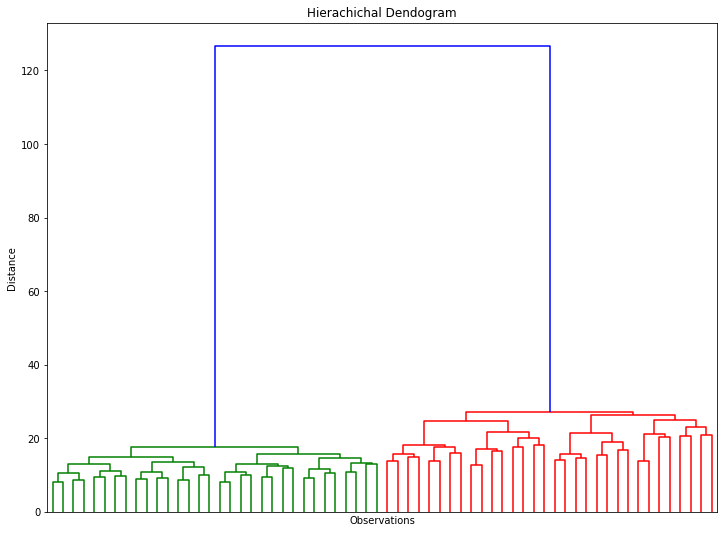

In [7]:
plt.figure(figsize=(12,9))
plt.title("Hierachichal Dendogram")
plt.xlabel("Observations")
plt.ylabel("Distance")

dendrogram(hier_cluster,show_leaf_counts=False,no_labels=True,truncate_mode='level',p=5)
plt.show()

### K-Means Clustering

In [8]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=500, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

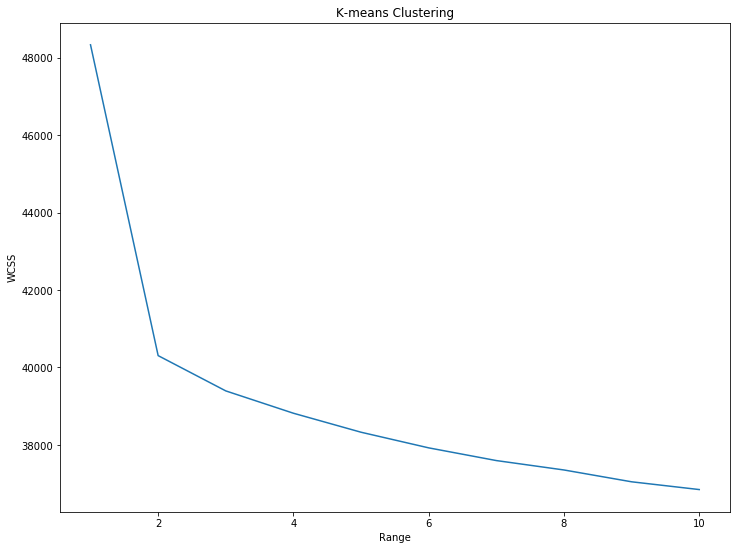

In [9]:
plt.figure(figsize=(12,9))
plt.plot(range(1,11),wcss)
plt.title("K-means Clustering")
plt.xlabel("Range")
plt.ylabel("WCSS")

In [10]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=500, random_state=0)

In [11]:
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [12]:
df_kmeans = df.copy()
df_kmeans['Segment K-means'] = kmeans.labels_

In [13]:
df_kmeans.head(10)

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,Segment K-means
0,-0.961933,0.441803,-0.975005,1.417504,0.818815,0.316294,-0.024967,-0.063966,0.031497,-0.350311,...,-0.216726,-0.055506,-0.484449,-0.521581,1.949135,1.324335,0.468147,1.061100,1.655970,2
1,-0.292526,-1.139267,0.195837,-1.281121,-0.251439,2.511997,-0.922206,0.059543,-1.409645,-0.656712,...,0.007290,0.099062,0.563853,-0.257275,-0.581781,-0.169887,-0.542304,0.312939,-1.284377,2
2,0.258788,-0.972845,0.588486,-0.800258,-1.820398,-2.058924,-0.064764,1.592124,-0.173117,-0.121087,...,0.009999,0.945810,-0.318521,-0.117889,0.621366,-0.070764,0.401682,-0.016227,-0.526553,2
3,-1.152132,-2.213168,-0.861525,0.630925,0.951772,-1.165724,-0.391559,1.063619,-0.350009,-1.489058,...,0.198946,-0.091833,0.349628,-0.298910,1.513696,0.671185,0.010855,-1.043689,1.625275,1
4,0.195783,0.593306,0.282992,0.247147,1.978668,-0.871018,-0.989715,-1.032253,-1.109654,-0.385142,...,-0.845707,-0.177497,-0.166491,1.483155,-1.687946,-0.141430,0.200778,-0.675942,2.220611,1
5,0.030124,-0.691014,-0.403426,-0.729859,-0.364099,1.125349,-1.404041,-0.806130,-1.237924,0.577602,...,0.241774,0.088640,0.182954,0.942677,-0.209600,0.536262,-1.185226,-0.422748,0.624360,2
6,0.085418,-1.113054,-0.677969,-0.562929,0.938194,0.118809,-2.192225,0.685073,0.262304,-1.229459,...,-0.272883,-1.767506,0.412261,0.707907,1.046001,-0.275772,-0.180286,0.335658,-0.489265,2
7,1.116610,1.341700,0.103278,0.390963,-1.927491,0.451692,-1.345070,0.625336,0.816305,-0.358081,...,0.906267,-0.628453,-0.550899,-0.710504,0.734773,0.728955,-0.022312,0.965941,-1.298200,2
8,-1.218857,-1.277279,-0.558925,-1.344493,1.159115,-1.501044,-0.554120,0.691499,-0.881673,0.454120,...,-0.190726,-0.434516,-1.365349,0.138637,0.956855,-1.052269,-0.418607,-1.134572,-0.333719,2
9,1.267369,-0.918349,-1.253500,-1.067114,-0.240638,1.163889,0.565089,0.949329,2.372266,1.706587,...,-0.249607,-0.670957,-1.050847,0.064282,1.413005,0.290409,0.519561,-0.949221,0.722572,2


In [14]:
#Save to csv
#df_kmeans.to_csv("usaarrestlabeled.csv",index=False)

In [15]:
df_analysis = df_kmeans.groupby(['Segment K-means']).mean()
df_analysis

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
Segment K-means,,,,,,,,,,,,,,,,,,,,,
0,-0.163929,0.029539,-0.045916,0.164950,-0.042757,-0.072325,0.010512,0.029054,0.063501,0.090969,...,1.966052,1.971194,2.079616,2.075234,1.872253,2.031958,2.086852,2.173111,2.095543,2.090132
1,0.168723,0.147946,0.033002,0.127387,-0.212961,-0.316255,0.091764,-0.283491,0.060744,-0.259330,...,0.074019,0.066816,0.326588,0.094401,-0.104208,-0.293645,-0.216929,0.018135,-0.008260,0.227964
2,-0.111935,-0.199306,-0.050069,-0.187164,0.118947,0.235523,-0.017044,0.240587,-0.028890,0.258496,...,-0.132940,0.026509,-0.339513,-0.133789,0.029877,0.300528,0.331703,-0.047713,-0.011933,-0.109420


In [16]:
df_analysis.rename({0:'A',1:'B',2:'C'})

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
Segment K-means,,,,,,,,,,,,,,,,,,,,,
A,-0.163929,0.029539,-0.045916,0.164950,-0.042757,-0.072325,0.010512,0.029054,0.063501,0.090969,...,1.966052,1.971194,2.079616,2.075234,1.872253,2.031958,2.086852,2.173111,2.095543,2.090132
B,0.168723,0.147946,0.033002,0.127387,-0.212961,-0.316255,0.091764,-0.283491,0.060744,-0.259330,...,0.074019,0.066816,0.326588,0.094401,-0.104208,-0.293645,-0.216929,0.018135,-0.008260,0.227964
C,-0.111935,-0.199306,-0.050069,-0.187164,0.118947,0.235523,-0.017044,0.240587,-0.028890,0.258496,...,-0.132940,0.026509,-0.339513,-0.133789,0.029877,0.300528,0.331703,-0.047713,-0.011933,-0.109420


In [17]:
df_kmeans['Label'] = df_kmeans['Segment K-means'].map({0:'A',1:'B',2:'C'})

In [18]:
df_kmeans

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,Segment K-means,Label
0,-0.961933,0.441803,-0.975005,1.417504,0.818815,0.316294,-0.024967,-0.063966,0.031497,-0.350311,...,-0.055506,-0.484449,-0.521581,1.949135,1.324335,0.468147,1.061100,1.655970,2,C
1,-0.292526,-1.139267,0.195837,-1.281121,-0.251439,2.511997,-0.922206,0.059543,-1.409645,-0.656712,...,0.099062,0.563853,-0.257275,-0.581781,-0.169887,-0.542304,0.312939,-1.284377,2,C
2,0.258788,-0.972845,0.588486,-0.800258,-1.820398,-2.058924,-0.064764,1.592124,-0.173117,-0.121087,...,0.945810,-0.318521,-0.117889,0.621366,-0.070764,0.401682,-0.016227,-0.526553,2,C
3,-1.152132,-2.213168,-0.861525,0.630925,0.951772,-1.165724,-0.391559,1.063619,-0.350009,-1.489058,...,-0.091833,0.349628,-0.298910,1.513696,0.671185,0.010855,-1.043689,1.625275,1,B
4,0.195783,0.593306,0.282992,0.247147,1.978668,-0.871018,-0.989715,-1.032253,-1.109654,-0.385142,...,-0.177497,-0.166491,1.483155,-1.687946,-0.141430,0.200778,-0.675942,2.220611,1,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.075148,3.003267,-0.123441,-1.036740,-1.270604,-1.277029,-0.278504,1.249723,-0.706994,-0.704671,...,0.546881,1.586981,-0.242043,0.507190,1.297424,0.314290,-1.513097,-0.074709,1,B
996,-1.226125,-0.501702,-0.717430,-0.169113,0.599530,-0.997987,0.028236,0.200508,-1.364865,0.564957,...,-0.594506,-1.443559,-0.028870,0.052170,-0.867227,0.228531,-0.207759,-0.209665,2,C
997,-3.056328,0.449889,1.880362,-0.742841,2.238346,-0.291738,1.270233,0.696415,1.242857,0.429148,...,-0.037468,-0.836689,0.020274,-0.803306,-0.907276,-0.781791,0.069908,1.336894,1,B
998,1.450658,1.310348,0.383837,-0.408860,-0.471111,-1.392396,-0.805808,0.210900,1.727079,0.862870,...,0.860270,0.765015,-2.360090,0.252699,-1.461818,-0.812342,-1.095099,-1.460114,1,B


In [19]:
# fig, ax = plt.subplots(figsize=(12,9))
# sns.scatterplot(x=df_kmeans.,y=df_kmeans.UrbanPop,hue=df_kmeans.Label,ax=ax)
# plt.show()

### PCA

In [20]:
pca = PCA()

In [21]:
pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [22]:
pca.explained_variance_ratio_

array([0.18699299, 0.02998891, 0.02842005, 0.02751355, 0.02714304,
       0.02649283, 0.02585679, 0.0253583 , 0.02489026, 0.02467986,
       0.02431694, 0.02423387, 0.02355519, 0.02297315, 0.02263365,
       0.02243292, 0.02177749, 0.02151727, 0.02111598, 0.02088552,
       0.02060847, 0.02035784, 0.01995302, 0.01982156, 0.01934277,
       0.0188597 , 0.01867544, 0.01805316, 0.0178497 , 0.01766985,
       0.0173848 , 0.01691103, 0.01659561, 0.01647373, 0.01588294,
       0.01531126, 0.01525017, 0.01461167, 0.01382375, 0.01378497])

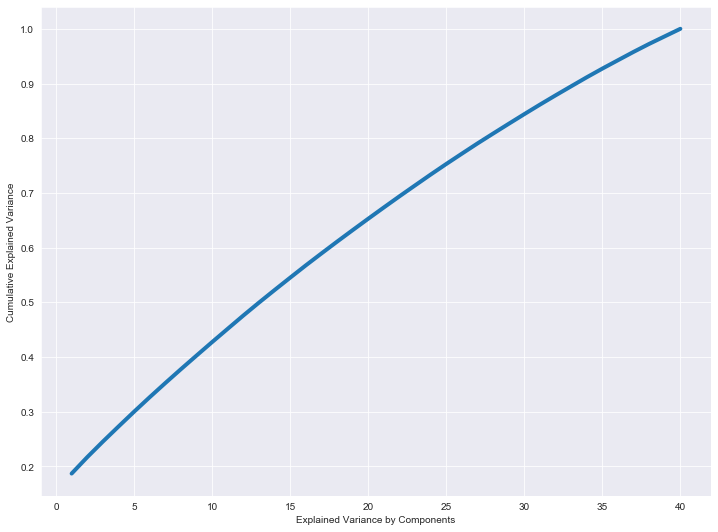

In [23]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,9))
plt.plot(range(1,41),pca.explained_variance_ratio_.cumsum(),linewidth=4)
plt.xlabel('Explained Variance by Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

**Choose 32 to represent 90%**

In [24]:
pca3 = PCA(n_components=32)

In [25]:
pca3.fit(df)

PCA(copy=True, iterated_power='auto', n_components=32, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [26]:
pca3.explained_variance_ratio_

array([0.18699299, 0.02998891, 0.02842005, 0.02751355, 0.02714304,
       0.02649283, 0.02585679, 0.0253583 , 0.02489026, 0.02467986,
       0.02431694, 0.02423387, 0.02355519, 0.02297315, 0.02263365,
       0.02243292, 0.02177749, 0.02151727, 0.02111598, 0.02088552,
       0.02060847, 0.02035784, 0.01995302, 0.01982156, 0.01934277,
       0.0188597 , 0.01867544, 0.01805316, 0.0178497 , 0.01766985,
       0.0173848 , 0.01691103])

In [27]:
pca3.components_

array([[-0.02091608,  0.00438762, -0.00683613, ...,  0.23287019,
         0.22594517,  0.2220526 ],
       [-0.10389959, -0.08087044, -0.07917628, ..., -0.12431469,
        -0.01347801, -0.14606676],
       [-0.10007971,  0.00511755, -0.0631015 , ...,  0.08456637,
         0.00044496,  0.08640635],
       ...,
       [-0.1031056 ,  0.03823962,  0.20697655, ..., -0.05120676,
         0.12229559,  0.07044918],
       [ 0.01808517,  0.28665551, -0.02931815, ...,  0.24294969,
         0.09769061,  0.05726923],
       [-0.08974051,  0.04761864,  0.12968717, ...,  0.02626986,
        -0.10025169, -0.0819634 ]])

In [28]:
df_pca_comp = pd.DataFrame(data=pca3.components_,columns=df.columns.values)

In [29]:
df_pca_comp

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-0.020916,0.004388,-0.006836,0.020380,0.000618,0.004780,-0.006258,0.001747,0.000959,0.016407,...,0.229183,0.211364,0.227856,0.230579,0.204102,0.220600,0.223404,0.232870,0.225945,0.222053
1,-0.103900,-0.080870,-0.079176,-0.235332,0.352224,0.180699,-0.002509,0.115597,-0.120942,0.229232,...,-0.153497,-0.007427,-0.249624,-0.099854,0.112344,0.262976,0.216606,-0.124315,-0.013478,-0.146067
2,-0.100080,0.005118,-0.063102,-0.225274,0.002353,-0.130813,-0.020224,0.086368,0.069979,0.046301,...,0.203139,-0.075395,0.185148,0.011455,-0.002867,-0.103713,0.126622,0.084566,0.000445,0.086406
3,-0.151951,-0.049276,0.045075,0.284976,-0.106749,0.201955,0.085473,0.076765,0.212027,0.288955,...,0.213347,-0.036032,-0.211269,-0.055461,0.063300,-0.171907,-0.133478,-0.072220,-0.071550,-0.021777
4,0.065119,-0.070901,-0.084859,0.030051,-0.229889,0.073335,-0.459223,0.091106,-0.113344,-0.071471,...,-0.016558,0.136840,-0.422694,-0.156927,-0.022055,0.112359,-0.078803,0.020705,-0.032487,0.105794
5,-0.257882,0.161871,-0.231501,-0.160873,0.195234,-0.073187,0.091789,-0.118196,-0.056821,0.088560,...,-0.013593,-0.170893,0.001144,-0.054194,0.127370,-0.253461,-0.060851,-0.165074,0.120102,0.180438
6,-0.087779,-0.078341,0.273088,-0.027105,-0.065216,0.102548,-0.007136,-0.041548,0.203692,0.014613,...,-0.046568,0.142609,-0.157147,-0.183462,-0.034929,0.025845,0.004749,0.294217,0.114897,-0.028871
7,0.191731,-0.015769,-0.143578,-0.154631,0.071826,0.121977,0.141419,-0.194584,0.142690,-0.102927,...,0.166446,0.143783,0.041638,-0.080726,0.321541,-0.037550,-0.363591,-0.106969,0.008683,-0.195549
8,-0.052608,-0.131775,0.184515,-0.007697,0.005210,-0.242618,0.050186,-0.067670,0.039248,-0.186853,...,-0.133080,-0.001787,-0.051840,-0.027076,-0.045251,-0.072853,-0.045833,0.103593,0.140314,0.149800
9,-0.089959,0.287941,-0.169744,-0.076373,-0.023648,0.097073,0.218971,0.429600,0.139995,0.022859,...,0.161568,-0.055176,-0.194068,-0.069284,-0.240210,0.109601,0.050729,0.000871,0.061586,-0.166680


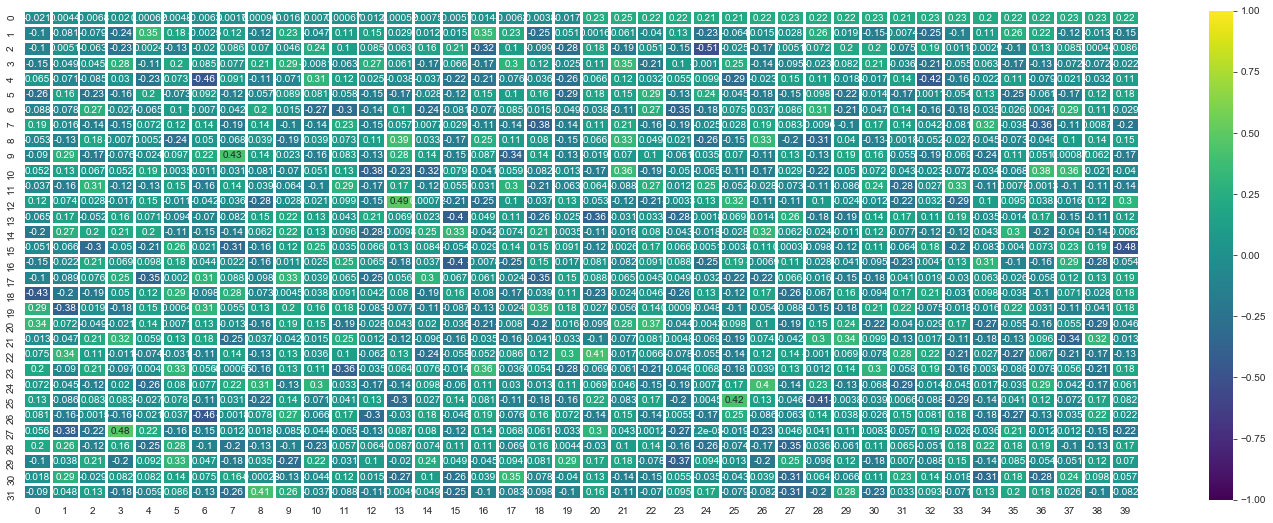

In [30]:
plt.figure(figsize=(25,9))
sns.heatmap(df_pca_comp,vmin=-1,vmax=1.0,annot=True, cmap='viridis',linewidths=2, fmt='.2g')
plt.show()

In [31]:
pca3.transform(df)

array([[-0.71011088,  1.48128783,  0.36784868, ...,  0.57264091,
         1.06208754, -0.09477177],
       [-1.99670061,  0.82966747,  1.86846389, ...,  0.58985087,
         1.1237244 ,  0.13661051],
       [-0.68787756, -0.16862144,  0.64549826, ..., -0.48447958,
        -0.65688572, -1.0499193 ],
       ...,
       [-1.27886005, -0.29149441,  1.72577642, ...,  0.88869289,
         0.95179742,  1.00188595],
       [-1.66588628, -1.23577786,  1.63166686, ..., -0.60743536,
         1.68495408,  1.14459338],
       [-2.1874267 , -0.53515874,  0.34045077, ...,  1.22009218,
         0.86470255,  0.93633568]])

In [32]:
scorespca = pca3.transform(df)

In [33]:
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters=i, init='k-means++', max_iter=500, random_state=0)
    kmeans_pca.fit(scorespca)
    wcss.append(kmeans_pca.inertia_)

Text(0, 0.5, 'WCSS')

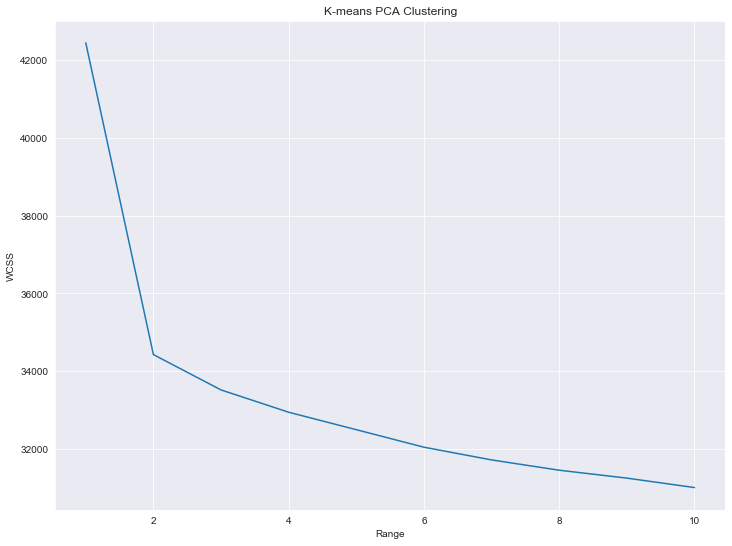

In [34]:
plt.figure(figsize=(12,9))
plt.plot(range(1,11),wcss)
plt.title("K-means PCA Clustering")
plt.xlabel("Range")
plt.ylabel("WCSS")

### Note: Almost similar to KMeans result